# Libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

# Import data

In [46]:
df = pd.read_csv('./insurance.csv')

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
df.sex = df.sex.apply(lambda x: 1 if x == 'female' else 0)
df.smoker = df.smoker.apply(lambda x: 1 if x == 'yes' else 0)

In [49]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


# EDA 

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

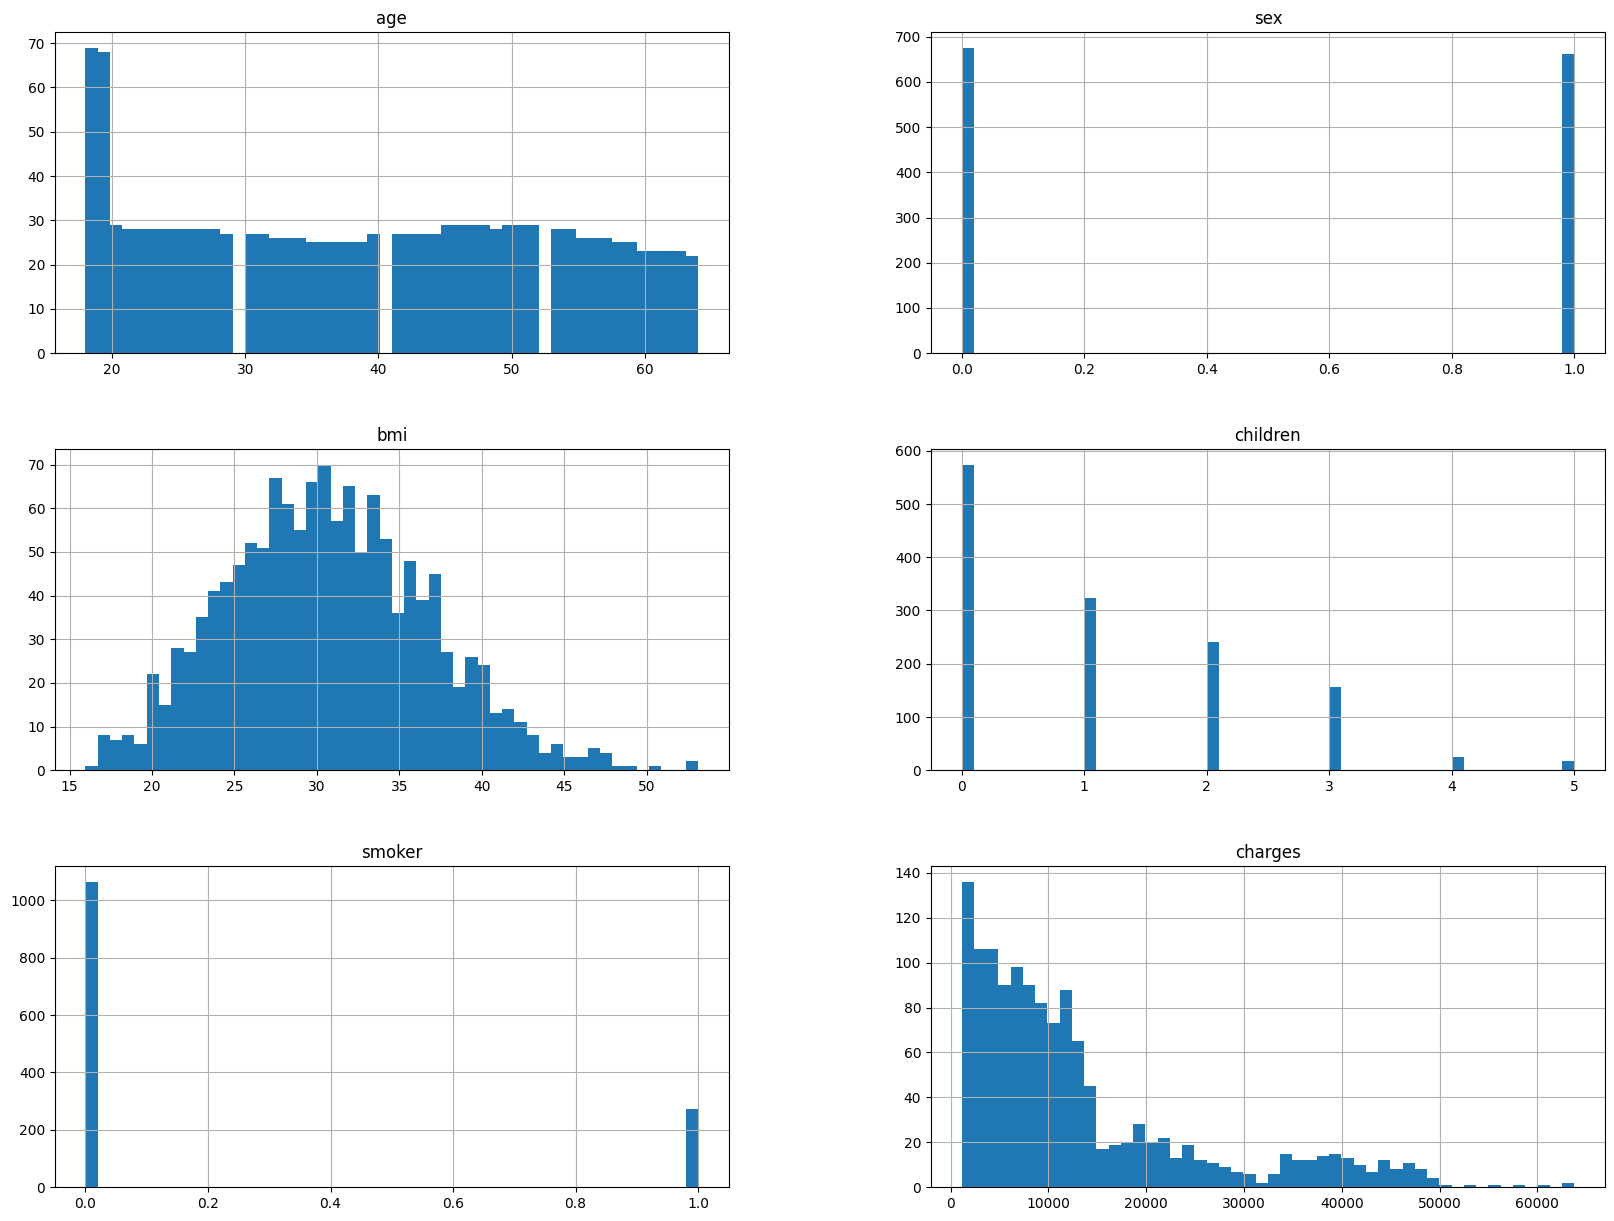

In [50]:
df.hist(bins=50, figsize=(20,15))


In [51]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='bmi', ylabel='sex'>,
        <Axes: xlabel='children', ylabel='sex'>,
        <Axes: xlabel='smoker', ylabel='sex'>,
        <Axes: xlabel='charges', ylabel='sex'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='sex', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='smoker', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='sex', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel=

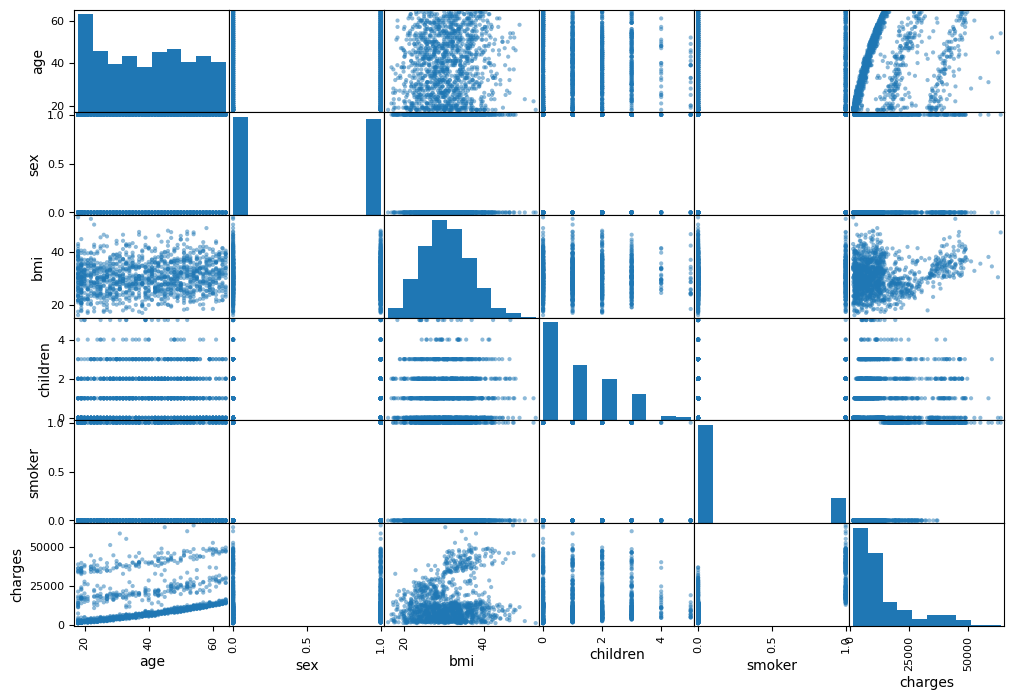

In [52]:

attributes = df.columns
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

<Axes: >

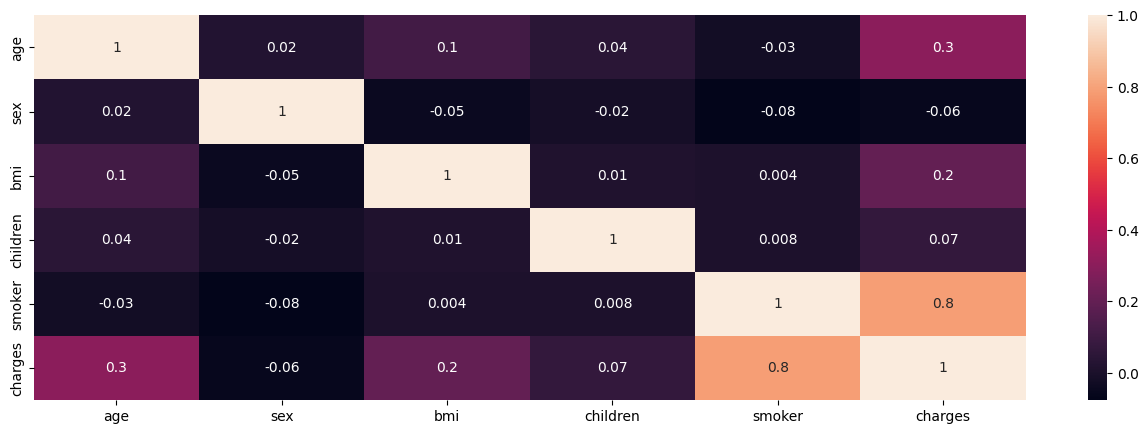

In [53]:
fig, ax = plt.subplots(figsize=(16, 5))

corr_marrix = df.corr(numeric_only=True)
sns.heatmap(corr_marrix,annot=True,fmt='.1g',ax=ax)

<Axes: >

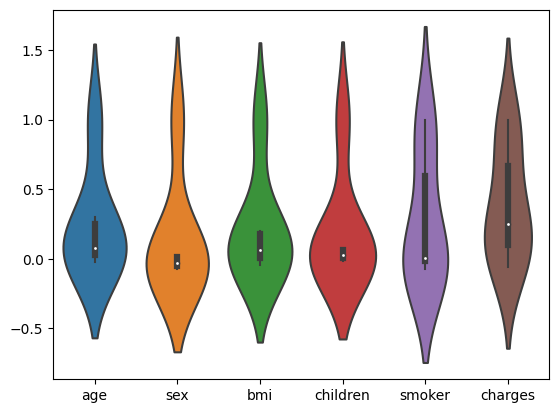

In [54]:
sns.violinplot(corr_marrix,annot=True,fmt='.1g',)

<Axes: >

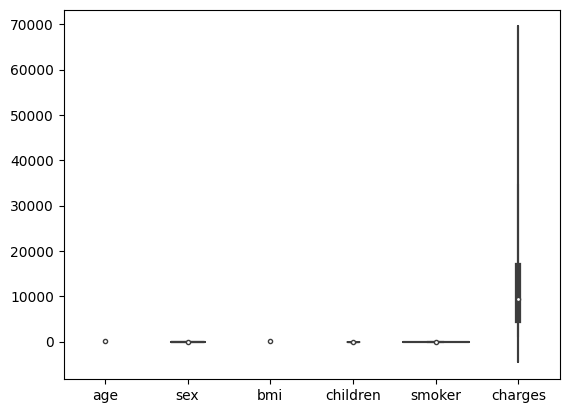

In [55]:
sns.violinplot(df,annot=True,fmt='.1g',)

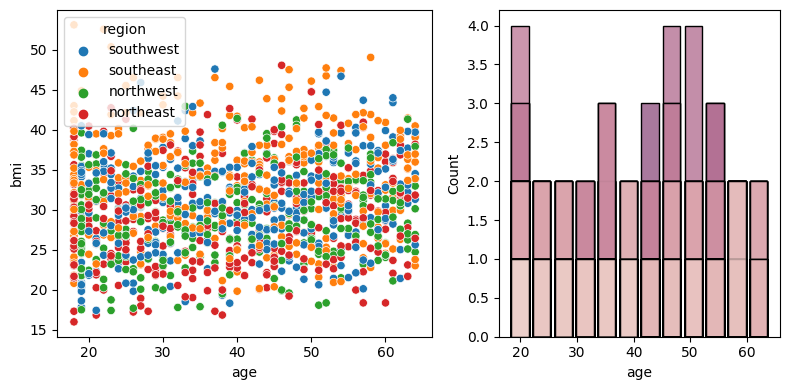

In [56]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x="age", y="bmi", hue="region", ax=axs[0])
sns.histplot(data=df, x="age", hue="bmi", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

# PreProccess

In [44]:
from sklearn import model_selection
X = df.drop("charges", inplace=False, axis=1)
y = df["bmi"]
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,northwest
1285,47,0,24.320,0,0,northeast
1142,52,0,24.860,0,0,southeast
969,39,0,34.320,5,0,southeast
486,54,0,21.470,3,0,northwest
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,northeast
1130,39,0,23.870,5,0,southeast
1294,58,0,25.175,0,0,northeast
860,37,0,47.600,2,1,southwest


## OneHot

In [92]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])


In [95]:
from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse_output=False)
cat_encoder = OneHotEncoder()
# cat_encoder.fit(X_train_num)
cat_encoder.fit(df["region"].values.reshape(-1, 1))


OneHotEncoder()

In [96]:
cat_train_encoded = cat_encoder.transform(X_train["region"].values.reshape(-1, 1))
cat_train_encoded


cat_test_encoded = cat_encoder.transform(X_test["region"].values.reshape(-1, 1))
cat_test_encoded

<268x4 sparse matrix of type '<class 'numpy.float64'>'
	with 268 stored elements in Compressed Sparse Row format>

In [106]:
X_train_num = X_train.select_dtypes(include=[np.number])

In [107]:
X_test_num = X_test.select_dtypes(include=[np.number])

## Scaler

In [108]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train_num)


StandardScaler()

In [110]:
X_train_scaled = std_scaler.transform(X_train_num)
X_test_scaled = std_scaler.transform(X_test_num)

# Trainnig

In [111]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error,confusion_matrix


In [112]:
linear = linear_model.LinearRegression()

In [115]:
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [118]:
with sklearn.config_context(working_memory=8):
    y_predict = linear.predict(X_test_scaled)

In [119]:
mean_absolute_percentage_error(y_test,y_predict)

9.581398824077861e-17

In [120]:
mean_absolute_error(y_test,y_predict)

2.8236119909869654e-15

In [121]:
r2_score(y_test,y_predict)

1.0

In [122]:
mean_squared_error(y_test,y_predict)

1.8414603817397946e-29

In [123]:
from sklearn.metrics import d2_pinball_score, make_scorer
d2_pinball_score_08 = make_scorer(d2_pinball_score, alpha=0.8)
from sklearn.metrics import d2_absolute_error_score

d2_absolute_error_score(y_test, y_predict)


0.9999999999999994

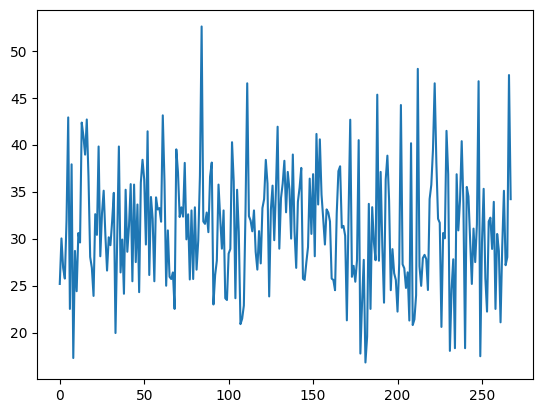

In [124]:
plt.plot(y_predict)